# Survival Prediction with TITANIC data using LOGISTIC REGRESSION


In [2]:
import os
from urllib import request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set()

In [4]:
url = "https://raw.githubusercontent.com/htetaunglynn94/portfolio_projects/refs/heads/main/data/titanic_train.csv"
# root = os.getcwd()
# path = os.path.join(root, "titanic_train.csv")
# request.urlretrieve(url, path)
data = pd.read_csv(url)

### Defined functions

In [ ]:
def plot_counts(col, xlabel, ylabel, title, based_on=None,
                xticks_label=False, xticks=None, legend_labels=False,
                l_labels=None):
    # palette = sns.color_palette("pastel")
    ax = sns.countplot(data=data, x=col, hue=based_on,
                       legend=False if legend_labels == False else 'auto')
    for p in ax.patches:
        y = p.get_height()
        if y > 0:
            x = p.get_x() + p.get_width() / 2
            ax.annotate(int(y), (x,y), ha='center', va='bottom', color='red')

    # Improve appearance
    plt.title(title, fontsize=20, weight='bold')
    plt.xlabel(xlabel, weight='bold')
    plt.ylabel(ylabel, weight='bold')

    # Add customized xtick labels
    if xticks_label and xticks:
        position = np.arange(data[col].nunique())
        plt.xticks(position, xticks)

    # Add customized legend labels
    if legend_labels:
        handles, _ = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=l_labels, title=based_on)

    plt.show()

### Check data properties

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
# Basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# No. of missing values in each columns
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Handling missing values

In [ ]:
# Remove "Cabin" column from the data frame
data.drop(columns="Cabin", axis=1, inplace=True)

In [ ]:
# Replace missing values in "Age" column by mean
data.fillna({'Age': data['Age'].mean()}, inplace=True)

In [ ]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# Find the mode value of "Embarked" column (max frequency)
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
# Replace missing values in "Embarked" column
data.fillna({"Embarked": data["Embarked"].mode()[0]}, inplace=True)

In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Get statistical values from the data
data.describe()
# Except "Fare" column, others are not useful

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check no. of people 'survived' and 'not survived'
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
# Check no. of people 'Male' and 'Female'
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
# Check Pclass
data['Pclass'].value_counts(sort=False)

,count
Pclass,
3,491
1,216
2,184


In [ ]:
# Check Embarked
data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


### Visualization

In [ ]:
data['Pclass'].unique()

array([3, 1, 2])

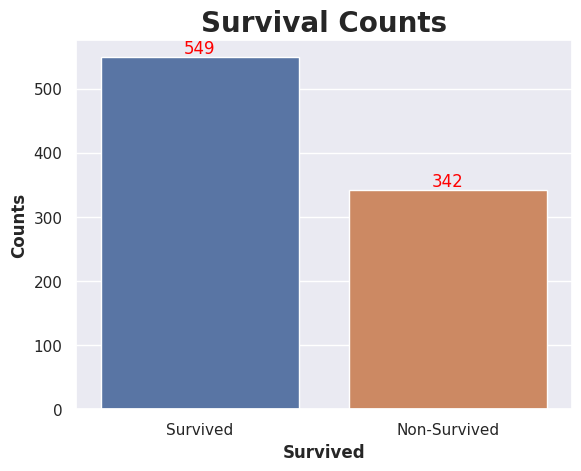

In [ ]:
# Count plot for "Survived" column
plot_counts(col='Survived', xlabel='Survived', ylabel='Counts',
            title='Survival Counts', based_on='Survived',
            xticks_label=True,  xticks=['Survived', 'Non-Survived'])

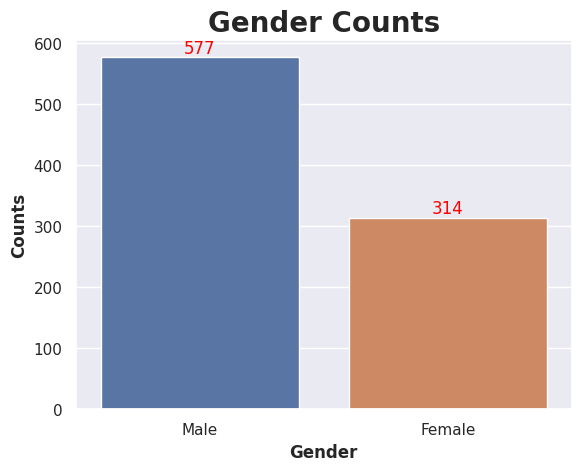

In [ ]:
# Count plot for "Sex" column
plot_counts(col='Sex', xlabel='Gender', ylabel='Counts',
            title='Gender Counts',
            based_on='Sex', xticks_label=True,
            xticks=['Male', 'Female'])

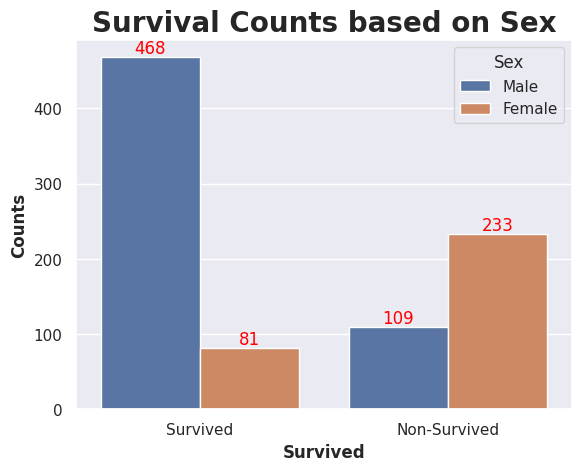

In [ ]:
# Number of survivors based on gender
plot_counts(col='Survived', xlabel='Survived', ylabel='Counts',
            title='Survival Counts based on Sex',
            based_on='Sex', legend_labels=True,
            xticks_label=True,
            xticks=['Survived', 'Non-Survived'],
            l_labels=['Male', 'Female'])

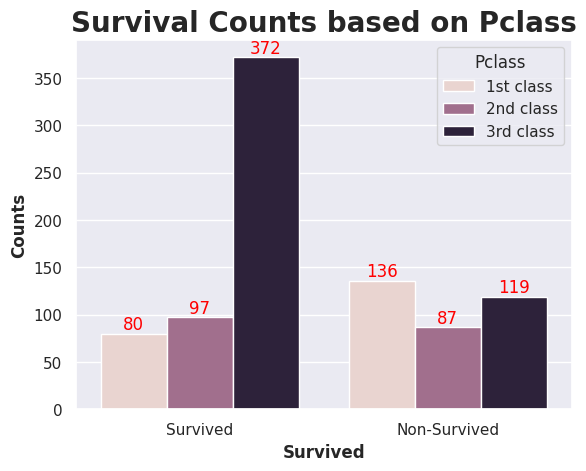

In [ ]:
# Number of survivors based on Pclass
plot_counts(col='Survived', xlabel='Survived', ylabel='Counts',
            title='Survival Counts based on Pclass',
            based_on='Pclass', legend_labels=True,
            xticks_label=True,
            xticks=['Survived', 'Non-Survived'],
            l_labels=['1st class', '2nd class', '3rd class'])

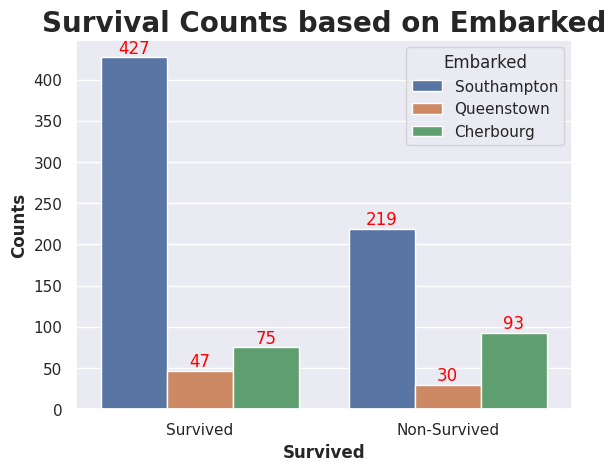

In [ ]:
# # Number of survivors based on embarked
plot_counts(col='Survived', xlabel='Survived', ylabel='Counts',
            title='Survival Counts based on Embarked',
            based_on='Embarked', legend_labels=True,
            xticks_label=True,
            xticks=['Survived', 'Non-Survived'],
            l_labels=['Southampton', 'Queenstown', 'Cherbourg'])

### Encode categorical columns

In [ ]:
# data.map({'Sex': {'male': 0, 'female': 1},
#           'Embarked': {'S': 0, 'C': 1, 'Q': 2}})

data.replace({'Sex': {'male': 0, 'female': 1},
              'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

# male = 0, female = 1
# S = 0, C = 1, Q = 2

/tmp/ipython-input-128-2864774941.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Sex': {'male': 0, 'female': 1},


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Separate `Features` and `Target`

In [ ]:
X = data.drop(columns=['Name','PassengerId','Ticket','Survived'], axis=1)
y = data['Survived']

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_scaled.

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

### Split data into `Train` and `Test`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

### Model training

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression()

### Model evaluation

In [ ]:
# Predict on train data
x_train_pred = log_reg.predict(X_train)
# Predict on test data
x_test_pred = log_reg.predict(X_test)

In [ ]:
# Score on train data prediction
accuracy_score(y_train, x_train_pred)

0.8089887640449438

In [ ]:
# Score on test data prediction
accuracy_score(y_test, x_test_pred)

0.7821229050279329